In [126]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
from sklearn.manifold import TSNE

In [104]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

#train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print(train_images.shape)

(60000, 28, 28)
(60000, 28, 28)


In [105]:
(val_images, val_labels) = (np.concatenate((train_images[0:5000], test_images[0:5000])),
                            np.concatenate((train_labels[0:5000], test_labels[0:5000])))
                            
(train_images, train_labels) = (train_images[5000:], train_labels[5000:])
(test_images, test_labels) = (test_images[5000:], test_labels[5000:])

In [106]:
encoder = models.Sequential()
encoder.add(layers.Flatten(input_shape = (28, 28)))
encoder.add(layers.Dense(512, activation='relu'))
encoder.add(layers.Dropout(0.5))
encoder.add(layers.Dense(256, activation='relu'))
encoder.add(layers.Dropout(0.5))
encoder.add(layers.Dense(128, activation='relu'))
encoder.add(layers.Dropout(0.5))
encoder.add(layers.Dense(64, activation='relu'))
encoder.add(layers.Dropout(0.5))
encoder.add(layers.Dense(32, activation='relu'))
encoder.add(layers.Dropout(0.5))
encoder.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)             

In [107]:
decoder = models.Sequential()
decoder.add(layers.Dense(64, activation='relu', input_shape = (32,)))
decoder.add(layers.Dropout(0.5))
decoder.add(layers.Dense(128, activation='relu'))
decoder.add(layers.Dropout(0.5))
decoder.add(layers.Dense(256, activation='relu'))
decoder.add(layers.Dropout(0.5))
decoder.add(layers.Dense(512, activation='relu'))
decoder.add(layers.Dropout(0.5))
decoder.add(layers.Dense(784, activation='sigmoid'))
decoder.add(layers.Reshape((28,28)))
decoder.summary()


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)             

In [112]:
img = layers.Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = models.Model(inputs = img, outputs = output)
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss = "binary_crossentropy")

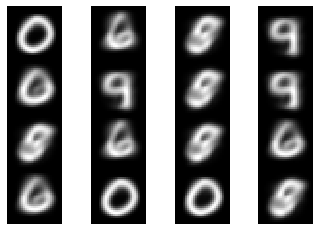

----------- EPOCH 99 -----------
Epoch 1/1
55000/55000 [==============================] - 12s 212us/step - loss: 0.2213


In [123]:
EPOCHS = 100
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = test_images[np.random.randint(0, 5000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(train_images, train_images, batch_size=128)

In [45]:
test_images[0].reshape((28,28,1)).shape

(28, 28, 1)

In [147]:
x_test_encoded = encoder.predict(train_images, batch_size=32)
#x_test_encoded = x_test_encoded.astype('uint8')

In [149]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(x_test_encoded)
X_embedded.shape

(55000, 2)

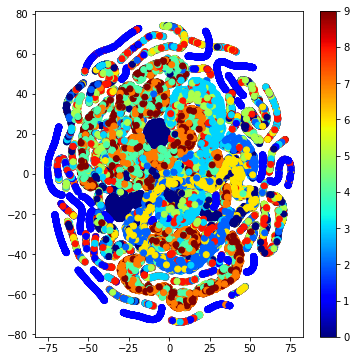

In [151]:
X_embedded
plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=train_labels, cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.show()

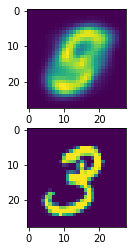

In [125]:
index = 1

plt.figure()
plt.subplot(211)
plt.imshow(model.predict( train_images[index].reshape((1,28,28)) )[0])
plt.subplot(212)
plt.imshow(train_images[index])